# 3W - Exploratory Data Analysis

In [9]:
# IMPORTS AND CONFIGURATIONS

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import pandas_profiling
# from pandas_profiling import ProfileReport

import glob
import os

## Data Understanding
Preprocessing a dataset through data characterisation involves summarising the features and characteristics present in the data using statistical measures and visualisations techniques such as bar charts and scatter plots. After this stage, it should be possible to identify biases, patterns, trends, and any missing or irrelevant data in the data set that may need to be addressed.

This dataset is composed by instances of eight types of undesirable events characterized by eight process variables from three different sources: real instances, simulated instances and hand-drawn instances. All real instances were taken from the plant information system that is used to monitor the industrial processes at an operational unit in Brazilian state of Espírito Santo. The simulated instances were all generated using OLGA ([Schlumberger](https://www.software.slb.com/products/olga)), a dynamic multiphase flow simulator that is widely used by oil companies worldwide (Andreolli, 2016). Finally, the hand-drawn instances were generated by a specific tool developed by Petrobras researchers for this dataset to incorporate undesirable events classfied as rare. 
 
### Data Characterisation
The data consists of over 50 million observations, with 13 columns of data for each observation. The first column, `label`, indicates the event type for each observation. The second column, `well`, contains the name of the well the observation was taken from. Hand-drawn and simulated instances have fixed names for in this column, while real instances have names masked with incremental id. The third column, `id`, is an identifier for the observation and it is incremental for hand-drawn and simulated instances, while each real instance has an id generated from its first timestamp. The columns representing the process variables are:

* P-PDG: pressure variable at the Permanent Downhole Gauge (PDG);
* P-TPT: pressure variable at the Temperature and Pressure Transducer (TPT);
* T-TPT: temperature variable at the Temperature and Pressure Transducer (TPT);
* P-MON-CKP: pressure variable upstream of the production choke (CKP);
* T-JUS-CKP: temperature variable downstream of the production choke (CKP);
* P-JUS-CKGL: pressure variable upstream of the gas lift choke (CKGL);
* T-JUS-CKGL: temperature variable upstream of the gas lift choke (CKGL);
* QGL: gas lift flow rate;

The pressure features are measured in Pascal (Pa), the volumetric flow rate features are measured in standard cubic meters per second (SCM/s), and the temperature features are measured in degrees Celsius (°C). Finally `class` label can be used to identify periods of normal operation, fault transients, and faulty steady states, which can help with diagnosis and maintenance. 

In [10]:
df = pd.read_csv('3Wdataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13952911 entries, 0 to 13952910
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   label       int64  
 1   well        object 
 2   id          int64  
 3   P-PDG       float64
 4   P-TPT       float64
 5   T-TPT       float64
 6   P-MON-CKP   float64
 7   T-JUS-CKP   float64
 8   P-JUS-CKGL  float64
 9   T-JUS-CKGL  float64
 10  QGL         float64
 11  class       float64
 12  source      object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.4+ GB


In [11]:
df.head()

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,source
0,0,WELL-00002,20170625220127,0.0,8698015.0,117.6015,2142158.0,75.63453,2310426.0,NaN,0.0,0.0,real
1,0,WELL-00002,20170625220127,0.0,8698015.0,117.6014,2172395.0,75.65491,2310427.0,NaN,0.0,0.0,real
2,0,WELL-00002,20170625220127,0.0,8698015.0,117.6013,2202631.0,75.67529,2310427.0,NaN,0.0,0.0,real
3,0,WELL-00002,20170625220127,0.0,8698015.0,117.6012,2180472.0,75.69567,2310427.0,NaN,0.0,0.0,real
4,0,WELL-00002,20170625220127,0.0,8698015.0,117.6011,2158313.0,75.71606,2310428.0,NaN,0.0,0.0,real


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,13952911.0,1.148766e+00,1.915042e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,7.000000e+00
id,13952911.0,2.016723e+13,1.100105e+10,2.013110e+13,2.017022e+13,2.017062e+13,2.017082e+13,2.018062e+13
P-PDG,13947036.0,-1.793768e+40,1.443842e+41,-1.180116e+42,0.000000e+00,0.000000e+00,2.557521e+07,4.485805e+07
P-TPT,13946727.0,1.658634e+07,8.299832e+07,0.000000e+00,8.765344e+06,1.421212e+07,1.806949e+07,2.941990e+09
T-TPT,13946725.0,1.076740e+02,2.029370e+01,0.000000e+00,1.065922e+02,1.166376e+02,1.175977e+02,1.196061e+02
P-MON-CKP,12831283.0,5.528575e+06,4.027920e+06,-8.317492e+03,1.757234e+06,5.448043e+06,9.295970e+06,1.235933e+07
T-JUS-CKP,12341213.0,7.391489e+01,3.101341e+01,-2.020000e+00,6.495843e+01,7.043581e+01,7.655559e+01,1.730961e+02
P-JUS-CKGL,10007488.0,4.052477e+06,5.221975e+06,-4.976717e+05,2.312238e+06,2.332198e+06,3.430441e+06,2.106982e+07
T-JUS-CKGL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QGL,10691260.0,1.694197e-01,4.591983e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.146513e+00


In order to maintain the realistic aspects of the data, the dataset was extracted without preprocessing, including the presence of `NaN` values, frozen variables due to sensor or communication issues, instances with varying sizes, and outliers (R.E.V. Vargas, et al. 2019). 

From all 50,822,124 entries, 3,086,851 are duplicated, that is, approximately 6.07% of total. These duplicated rows may be related to frozen variables from real instances, as simulated and hand-drawn instances are naturally free of such problems. Although no missing values were found for columns `label`, `well`, and `id`, other features presented null or absent values. Notably, the column `T-JUS-CKGL` turned out to be completely empty.

In [13]:
# Counting duplicated rows
df.duplicated().sum()

56920

In [16]:
# Finding missing values
missing = df.isnull()
missing.sum()

label                0
well                 0
id                   0
P-PDG             5875
P-TPT             6184
T-TPT             6186
P-MON-CKP      1121628
T-JUS-CKP      1611698
P-JUS-CKGL     3945423
T-JUS-CKGL    13952911
QGL            3261651
class             4761
source               0
dtype: int64

### Exploratory Data Analysis
There are 9 different labels in the dataset, with the majority of the data (13.2 million points) having a label of "Rapid Productivity Loss". The second most common label is "Normal", which is present in around 9.9 million data points. The remaining labels are present in smaller amounts, with the least common label being "Spurious Closure of DHSV" which is present in around 619,464 data points. See below a table with more details about each label and a bar chart describing how they are distributed:

In [19]:
label_counts = df['label'].value_counts()

# dictionary that maps labels to descriptions
label_descriptions = {
    0: 'Normal state',
    1: 'Abrupt Increase of BSW',
    2: 'Spurious Closure of DHSV',
    3: 'Severe Slugging',
    4: 'Flow Instability',
    5: 'Rapid Productivity Loss',
    6: 'Quick Restriction in PCK',
    7: 'Scaling in PCK',
    8: 'Hydrate in Production Line'
}

data = []
total_count = label_counts.sum()
for label, count in label_counts.items():
    description = label_descriptions[label]
    proportion = '{:.1%}'.format(count / total_count)    
    data.append((label, description, count, proportion))

df_table = pd.DataFrame(data, columns=['Label', 'Description', 'Value', 'Proportion (%)'])
df_table

,Label,Description,Value,Proportion (%)
0,0,Normal state,9956791,71.4%
1,4,Flow Instability,2462076,17.6%
2,3,Severe Slugging,569152,4.1%
3,5,Rapid Productivity Loss,361998,2.6%
4,7,Scaling in PCK,271708,1.9%
5,2,Spurious Closure of DHSV,158680,1.1%
6,1,Abrupt Increase of BSW,118294,0.8%
7,6,Quick Restriction in PCK,54212,0.4%


Text(0, 0.5, 'Count (Millions)')

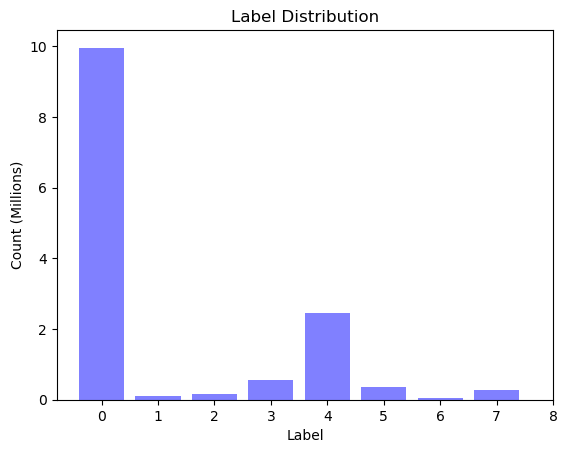

In [20]:
label_counts = df['label'].value_counts()
label_names = label_counts.index
label_values = label_counts.values / 1000000
plt.bar(label_names, label_values, color='#8080FF')
plt.xticks(range(9), range(9))
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count (Millions)')

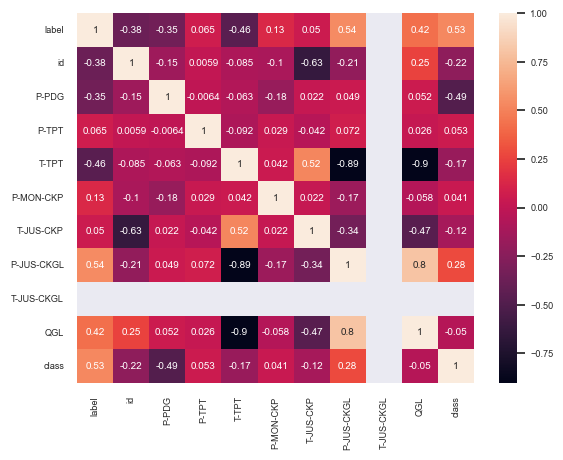

In [21]:
# Computing the correlations
corr = df.corr()
sns.set(font_scale=0.6)
sns.heatmap(corr, annot=True)
plt.show()

The heatmap above shows the correlation between all numerical features in a single graph. Overall, the `T-TPT` feature has very strong negative correlations with the features `P-JUS-CKGL` (-0.89) and `QGL` (-0.9). Also, `T-TPT` presents a strong positive correlation with `T-JUS-CKP` (0.6). In turn, `P-JUS-CKGL` has a strong positive correlation with `QGL` (0.8) and a moderate positive correlation with feature `label` (0.52). The `QGL` feature has also a moderate correlation with the `label` (0.42) and a moderate negative correlation with `T-JUS-CKP` (0.47). `T-JUS-CKGL` does not present correlations, since this feature is empty.

It's worth noting that the correlations are only one aspect to consider when analyzing the relationships between features in a dataset. It's also important to consider other factors such as the distribution of the data, the presence of outliers, and the underlying relationships between the features.

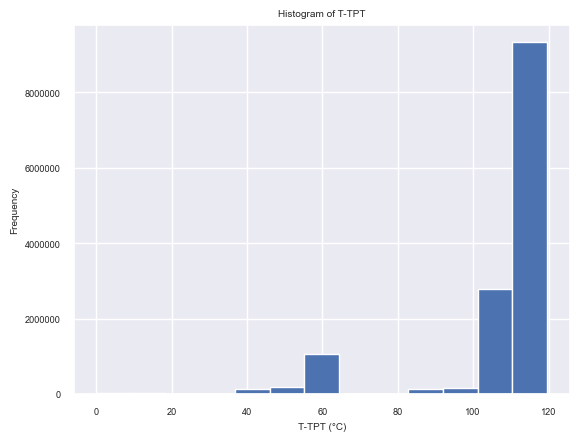

In [22]:
column = 'T-TPT'
df[column].plot(kind='hist', bins=13)
plt.title('Histogram of {}'.format(column))
plt.xlabel(f'{column} (°C)')
plt.ylabel('Frequency')

# Set the y-axis to show millions
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

The histogram above shows how the values for T-TPT (temperature variable at the Temperature and Pressure Transducer) are distributed. This variable appears to have a significant correlation with other features and must be considered in further investigations. As it can be seen, it presents values between 100°C and 120°C for the majority of observations, which may indicate that colder temperatures in this equipment are related to issues in the Subsea Christmas Tree operation. 

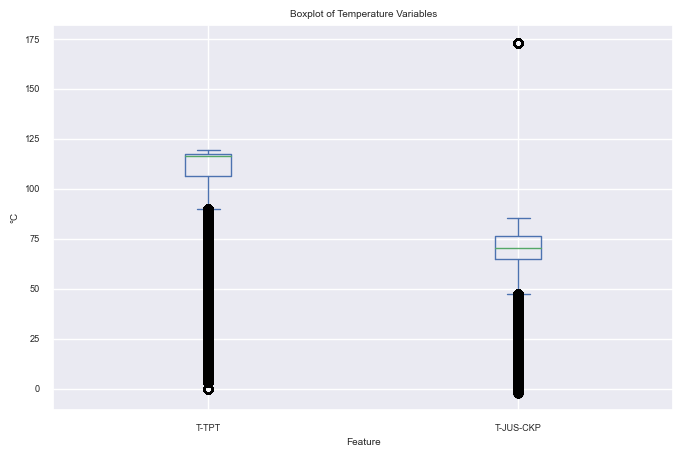

In [23]:
columns = ['T-TPT','T-JUS-CKP']

df[columns].plot(kind='box', figsize=(8, 5))
plt.title('Boxplot of Temperature Variables')
plt.xlabel('Feature')
plt.ylabel('°C')
plt.show()

The boxplots above compare how data is distributed in two features, `T-TPT` and `T-JUS-CKP` (temperature variable downstream of the production choke - CKP). While 50% of observations for `T-TPT` are between 95°C-120°C, `T-JUS-CKP` seems to work on milder conditions, with half of observations between 70°C-85°C.

The boxplots below present how data is distributed in the features measured in Pascal (Pa). As a reference for this analysis, the atmospheric pressure at sea level is approximately 101,325 Pa and the pressure that a body experiences at a 2000 meters below sea level - which is a realistic depth for a oil well in this project context - is approximately 2,061,200 Pa. 

To generate the following boxplots together, it was decided to omit the outlier points, since future analyzes will be necessary to understand the nature of these extraordinary measurements and they could distort the graphs considerably at this point.

From all pressure features, only `P-PDG` (pressure variable at the Permanent Downhole Gauge) presented negative values in its series. The PDG is installed at the bottom of the well and it may measure a negative pressure in pascals if the pressure inside the well is lower than the pressure outside the well, but it also measure values above 30 MPa. 

The features `P-MON-CKP` and `P-JUS-CKGL` - pressure variable upstream of the production choke and of the gas lift choke, respectively - present a more comparable range of values, with approximately half of measurements between 1 MPa and 5 MPa. Also, `P-TPT`(pressure variable at the Temperature and Pressure Transducer), presents the most symetric distribution among all 4 pressure features, which indicates that the data is closer to a normal distribution than in other features, with the median approximately 15 MPa.

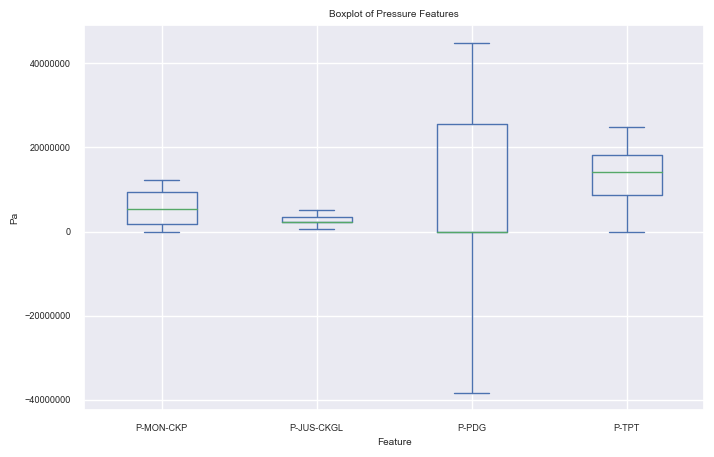

In [24]:
columns = ['P-MON-CKP','P-JUS-CKGL','P-PDG','P-TPT'] 
df[columns].plot(kind='box', figsize=(8, 5), showfliers=False)
plt.title('Boxplot of Pressure Features')
plt.xlabel('Feature')
plt.ylabel('Pa')
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

Finally, it was observed that `QGL` data (gas lift flow rate) is heavily concentrated at the range 0.0 SCM/s-0.2 SCM/s with more almost 10 million rows, while other ranges do not present more than 1 million observations. To illustrate how it is distributed throughout all ranges, it was decided to use log scale on y-axis (Frequency) for the following histogram.

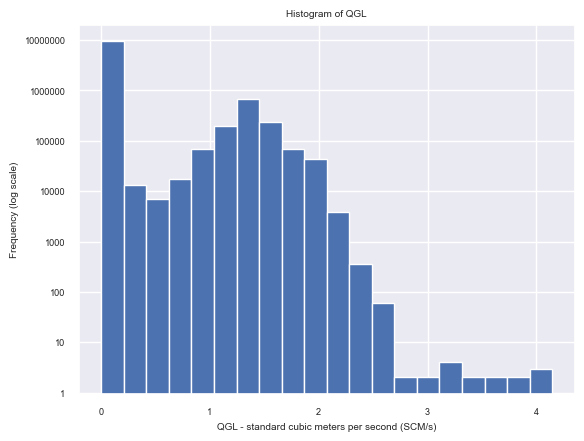

In [26]:
column = 'QGL'
df[column].plot(kind='hist', bins=20)
plt.title('Histogram of {}'.format(column))
plt.xlabel(f'{column} - standard cubic meters per second (SCM/s)')
plt.ylabel('Frequency (log scale)')

plt.semilogy() # to set the y-axis to log scale

def y_formatter(y, pos):
    return f'{y:.0f}'

formatter = FuncFormatter(y_formatter)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()